You are given a tree (i.e. a connected, undirected graph that has no cycles) consisting of n nodes numbered from 0 to n - 1 and exactly n - 1 edges. The root of the tree is the node 0, and each node of the tree has a label which is a lower-case character given in the string labels (i.e. The node with the number i has the label labels[i]).

The edges array is given on the form edges[i] = [ai, bi], which means there is an edge between nodes ai and bi in the tree.

Return an array of size n where ans[i] is the number of nodes in the subtree of the ith node which have the same label as node i.

A subtree of a tree T is the tree consisting of a node in T and all of its descendant nodes.

 

Example 1:

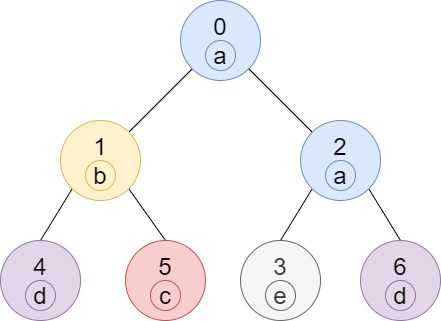

Input: n = 7, edges = [[0,1],[0,2],[1,4],[1,5],[2,3],[2,6]], labels = "abaedcd"
Output: [2,1,1,1,1,1,1]
Explanation: Node 0 has label 'a' and its sub-tree has node 2 with label 'a' as well, thus the answer is 2. Notice that any node is part of its sub-tree.
Node 1 has a label 'b'. The sub-tree of node 1 contains nodes 1,4 and 5, as nodes 4 and 5 have different labels than node 1, the answer is just 1 (the node itself).

Example 2:

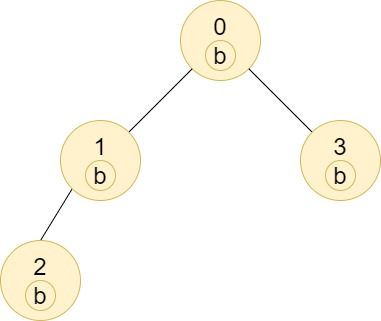

Input: n = 4, edges = [[0,1],[1,2],[0,3]], labels = "bbbb"
Output: [4,2,1,1]
Explanation: The sub-tree of node 2 contains only node 2, so the answer is 1.
The sub-tree of node 3 contains only node 3, so the answer is 1.
The sub-tree of node 1 contains nodes 1 and 2, both have label 'b', thus the answer is 2.
The sub-tree of node 0 contains nodes 0, 1, 2 and 3, all with label 'b', thus the answer is 4.

Example 3:

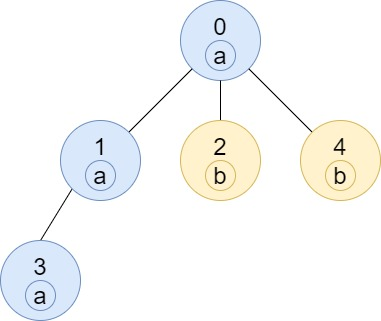

Input: n = 5, edges = [[0,1],[0,2],[1,3],[0,4]], labels = "aabab"
Output: [3,2,1,1,1]

 

Constraints:

    1 <= n <= 105
    edges.length == n - 1
    edges[i].length == 2
    0 <= ai, bi < n
    ai != bi
    labels.length == n
    labels is consisting of only of lowercase English letters.


In [ ]:
class Solution:
    def countSubTrees(self, n: int, edges: List[List[int]], labels: str) -> List[int]:
        graph = {i: [] for i in range(n)}
        for s, e in edges:
            graph[s].append(e)
            graph[e].append(s)
            
        ans = [0 for _ in range(n)]
        
        def dfs(node, parent):
            l = defaultdict(int)
            l[labels[node]] = 1
            children = [c for c in graph[node] if c != parent]
            for child in children:
                l_c = dfs(child, node)
                for key, value in l_c.items():
                    l[key] += value
            ans[node] = l[labels[node]]
            return l
        
        dfs(0, -1)
        
        return ans